In [173]:
#source for mandelbrot and julia provided by RosettaCodeimport matplotlib.pyplot as plt
import numpy as np
 
npts = 1000
max_iter = 1000

def mandelbrot(npts, max_iter):
    X = np.linspace(-1.252, -1.25, npts)
    Y = np.linspace(-.019, -.018, npts)

    #broadcast X to a square array
    C = X[:, None] + 1J * Y
    #initial value is always zero
    Z = np.zeros_like(C)
 
    exit_times = max_iter * np.ones(C.shape, np.int32)
    mask = exit_times > 0
 
    for k in range(max_iter):
        Z[mask] = Z[mask] * Z[mask] + C[mask]
        mask, old_mask = abs(Z) < 2, mask
        #use XOR to detect the area which has changed 
        exit_times[mask ^ old_mask] = k

    plt.imshow(exit_times.T, cmap=plt.cm.prism, extent=(X.min(), X.max(), Y.min(), Y.max()))

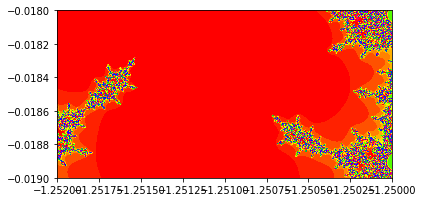

In [174]:
mandelbrot(npts, max_iter)

In [64]:
"""
Solution from:
https://codereview.stackexchange.com/questions/210271/generating-julia-set
"""
from functools import partial
from numbers import Complex
from typing import Callable
 
import matplotlib.pyplot as plt
import numpy as np
 
 
def douady_hubbard_polynomial(z: Complex,
                              c: Complex) -> Complex:
    """
    Monic and centered quadratic complex polynomial
    https://en.wikipedia.org/wiki/Complex_quadratic_polynomial#Map
    """
    return z ** 2 + c
 
 
def julia_set(mapping: Callable[[Complex], Complex],
              *,
              min_coordinate: Complex,
              max_coordinate: Complex,
              width: int,
              height: int,
              iterations_count: int = 256,
              threshold: float = 2.) -> np.ndarray:
    """
    As described in https://en.wikipedia.org/wiki/Julia_set
    :param mapping: function defining Julia set
    :param min_coordinate: bottom-left complex plane coordinate
    :param max_coordinate: upper-right complex plane coordinate
    :param height: pixels in vertical axis
    :param width: pixels in horizontal axis
    :param iterations_count: number of iterations
    :param threshold: if the magnitude of z becomes greater
    than the threshold we assume that it will diverge to infinity
    :return: 2D pixels array of intensities
    """
    im, re = np.ogrid[min_coordinate.imag: max_coordinate.imag: height * 1j,
                      min_coordinate.real: max_coordinate.real: width * 1j]
    z = (re + 1j * im).flatten()
 
    live, = np.indices(z.shape)  # indexes of pixels that have not escaped
    iterations = np.empty_like(z, dtype=int)
 
    for i in range(iterations_count):
        z_live = z[live] = mapping(z[live])
        escaped = abs(z_live) > threshold
        iterations[live[escaped]] = i
        live = live[~escaped]
        if live.size == 0:
            break
    else:
        iterations[live] = iterations_count
 
    return iterations.reshape((height, width))


In [65]:
mapping = partial(douady_hubbard_polynomial,
                      c=-0.7 + 0.27015j)

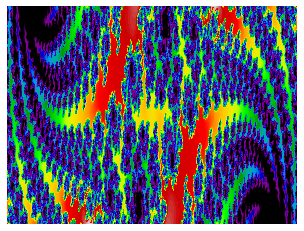

In [68]:
image = julia_set(mapping,
                      min_coordinate=-.59 - .09j,
                      max_coordinate=.59 + .09j,
                      width=800,
                      height=600)
plt.axis('off')
plt.imshow(image,
            cmap='nipy_spectral_r',
            origin='lower')
plt.show()